In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [27]:
table = pd.read_csv('10SELECTED.csv')    

In [28]:
table

,Molecule,smiles
0,propionate,CCC(=O)[O-]
1,vannilin,COC1=C(C=CC(=C1)C=O)O
2,Acetophenone,O=C(C1=CC=CC=C1)C
3,Coumarin,O1C2=CC=CC=C2C=CC1=O
4,Ethyl_Cinnamate,CCOC(=O)/C=C/C1=CC=CC=C1
5,Folic_acid,C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=...
6,caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C
7,Glycerine,C(C(CO)O)O
8,citric_acid,C(C(=O)O)C(CC(=O)O)(C(=O)O)O
9,Sodium_Lauryl_Sulphate,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+]


In [32]:
# We will calculate the descriptors and add them to our table
for i in table.index:
    mol=Chem.MolFromSmiles(table.loc[i,'smiles'])
    table.loc[i,'MolWt']=Descriptors.ExactMolWt (mol)
    table.loc[i,'TPSA']=Chem.rdMolDescriptors.CalcTPSA(mol) #Topological Polar Surface Area
    table.loc[i,'nRotB']=Descriptors.NumRotatableBonds (mol) #Number of rotable bonds
    table.loc[i,'HBD']=Descriptors.NumHDonors(mol) #Number of H bond donors
    table.loc[i,'HBA']=Descriptors.NumHAcceptors(mol) #Number of H bond acceptors
    table.loc[i,'LogP']=Descriptors.MolLogP(mol) #LogP
table.head(15)   

,Molecule,smiles,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,propionate,CCC(=O)[O-],73.029503,40.13,1.0,0.0,2.0,-0.8537
1,vannilin,COC1=C(C=CC(=C1)C=O)O,152.047344,46.53,2.0,1.0,3.0,1.2133
2,Acetophenone,O=C(C1=CC=CC=C1)C,120.057515,17.07,1.0,0.0,1.0,1.8892
3,Coumarin,O1C2=CC=CC=C2C=CC1=O,146.036779,30.21,0.0,0.0,2.0,1.7930
4,Ethyl_Cinnamate,CCOC(=O)/C=C/C1=CC=CC=C1,176.083730,26.30,3.0,0.0,2.0,2.2629
5,Folic_acid,C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=...,441.139681,213.28,9.0,6.0,9.0,-0.0448
6,caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,194.080376,61.82,0.0,0.0,6.0,-1.0293
7,Glycerine,C(C(CO)O)O,92.047344,60.69,2.0,3.0,3.0,-1.6681
8,citric_acid,C(C(=O)O)C(CC(=O)O)(C(=O)O)O,192.027003,132.13,5.0,4.0,4.0,-1.2485
9,Sodium_Lauryl_Sulphate,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],288.137125,66.43,12.0,0.0,4.0,0.3881


In [33]:
descriptors = table.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values

In [34]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [35]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [36]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = table.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(15)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.427893,1.108359,0.502589,0.073846,-0.240266,0.043987
1,-0.840696,-0.316487,-0.409805,-0.070851,0.123329,0.143256
2,-2.045776,-0.661661,-0.393962,-0.344690,-0.023785,-0.050820
3,-1.694569,-0.564959,-0.682790,0.066672,-0.089018,-0.060253
4,-1.388120,-1.278072,-0.298096,-0.144106,0.065781,-0.002114
5,4.955805,-0.550439,-0.773646,0.042891,-0.001970,-0.003648
6,0.035219,0.938016,-0.064133,1.571454,0.026048,-0.018140
7,-0.126638,1.796371,0.280654,-0.532188,0.320923,-0.040679
8,1.549872,1.087688,0.106918,-0.758292,-0.211920,-0.001423
9,0.982795,-1.558817,1.732271,0.095263,0.030879,-0.010165


In [37]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[6.61242730e-01 1.95697473e-01 8.04067849e-02 5.82185141e-02
 3.92154436e-03 5.12953879e-04]
1.0


<Figure size 800x600 with 0 Axes>

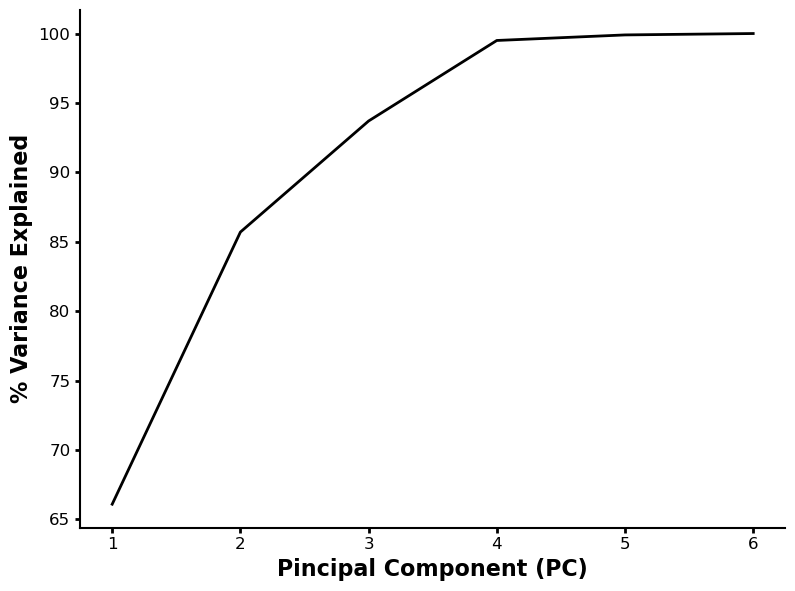

In [38]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

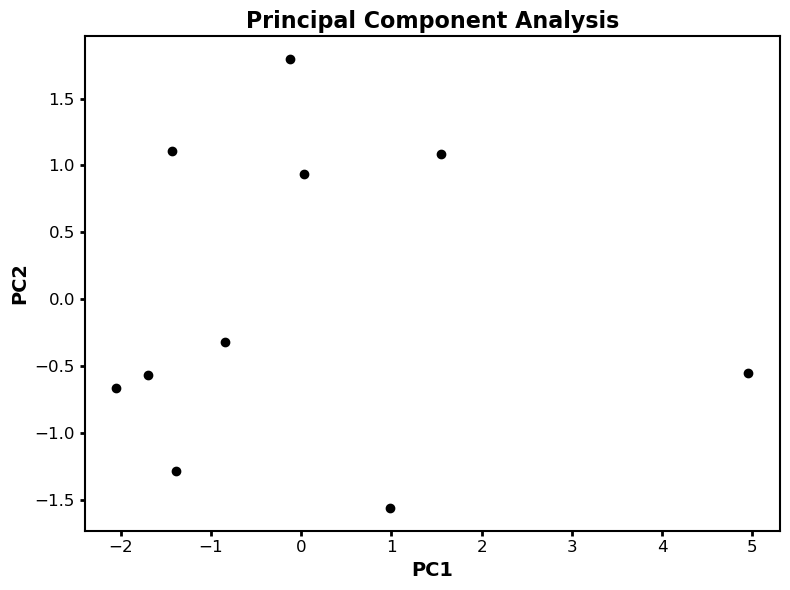

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [40]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

In [41]:
descriptors_pca.head(15)

,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized
0,-1.427893,1.108359,0.502589,0.073846,-0.240266,0.043987,-0.203939,0.330342
1,-0.840696,-0.316487,-0.409805,-0.070851,0.123329,0.143256,-0.120072,-0.094328
2,-2.045776,-0.661661,-0.393962,-0.344690,-0.023785,-0.050820,-0.292188,-0.197205
3,-1.694569,-0.564959,-0.682790,0.066672,-0.089018,-0.060253,-0.242027,-0.168384
4,-1.388120,-1.278072,-0.298096,-0.144106,0.065781,-0.002114,-0.198258,-0.380924
5,4.955805,-0.550439,-0.773646,0.042891,-0.001970,-0.003648,0.707812,-0.164056
6,0.035219,0.938016,-0.064133,1.571454,0.026048,-0.018140,0.005030,0.279572
7,-0.126638,1.796371,0.280654,-0.532188,0.320923,-0.040679,-0.018087,0.535401
8,1.549872,1.087688,0.106918,-0.758292,-0.211920,-0.001423,0.221360,0.324181
9,0.982795,-1.558817,1.732271,0.095263,0.030879,-0.010165,0.140368,-0.464599


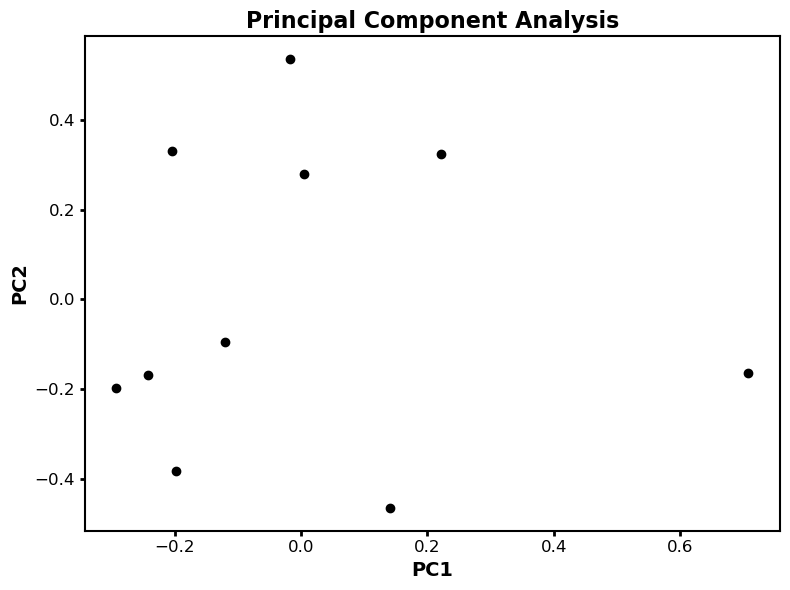

In [42]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43576967065846883
For n_clusters = 3 The average silhouette_score is : 0.49624196504671636
For n_clusters = 4 The average silhouette_score is : 0.4424022144779509


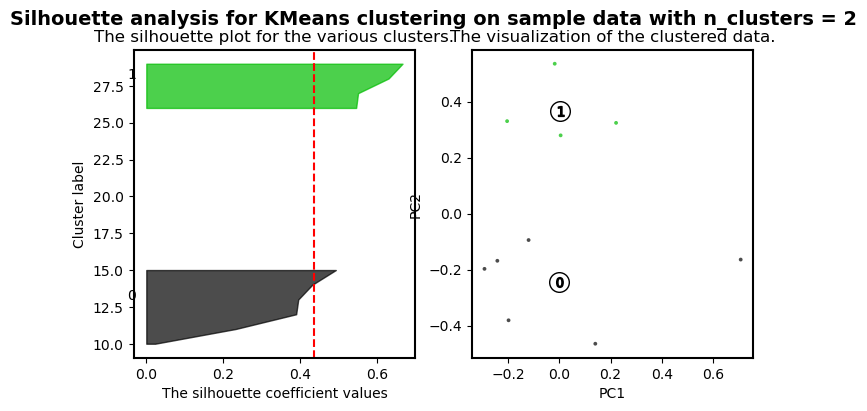

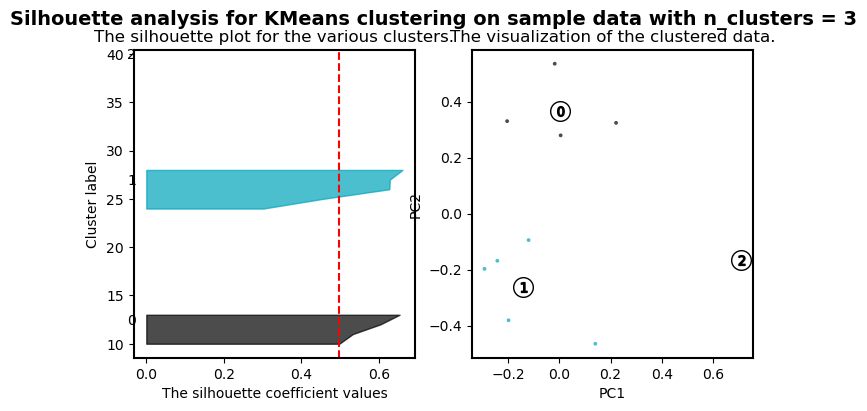

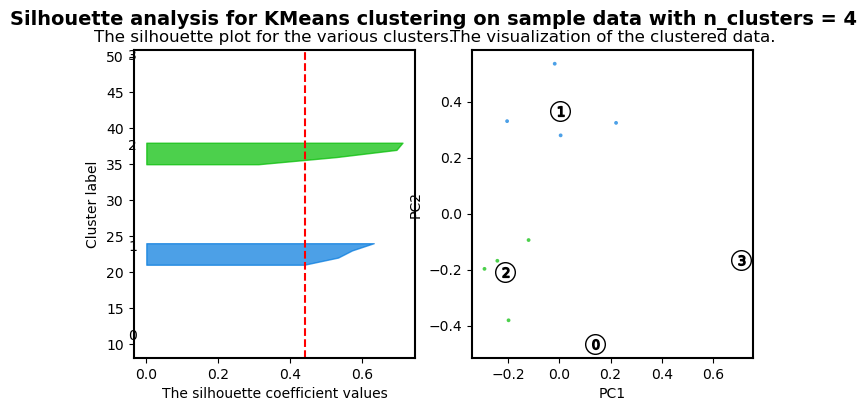

In [44]:
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


In [45]:
kmeans = KMeans(n_clusters=3, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

In [46]:
descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=table.index)

In [47]:
descriptors_pca.head(15)

,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
0,-1.427893,1.108359,0.502589,0.073846,-0.240266,0.043987,-0.203939,0.330342,0
1,-0.840696,-0.316487,-0.409805,-0.070851,0.123329,0.143256,-0.120072,-0.094328,1
2,-2.045776,-0.661661,-0.393962,-0.344690,-0.023785,-0.050820,-0.292188,-0.197205,1
3,-1.694569,-0.564959,-0.682790,0.066672,-0.089018,-0.060253,-0.242027,-0.168384,1
4,-1.388120,-1.278072,-0.298096,-0.144106,0.065781,-0.002114,-0.198258,-0.380924,1
5,4.955805,-0.550439,-0.773646,0.042891,-0.001970,-0.003648,0.707812,-0.164056,2
6,0.035219,0.938016,-0.064133,1.571454,0.026048,-0.018140,0.005030,0.279572,0
7,-0.126638,1.796371,0.280654,-0.532188,0.320923,-0.040679,-0.018087,0.535401,0
8,1.549872,1.087688,0.106918,-0.758292,-0.211920,-0.001423,0.221360,0.324181,0
9,0.982795,-1.558817,1.732271,0.095263,0.030879,-0.010165,0.140368,-0.464599,1


<Figure size 1000x800 with 0 Axes>

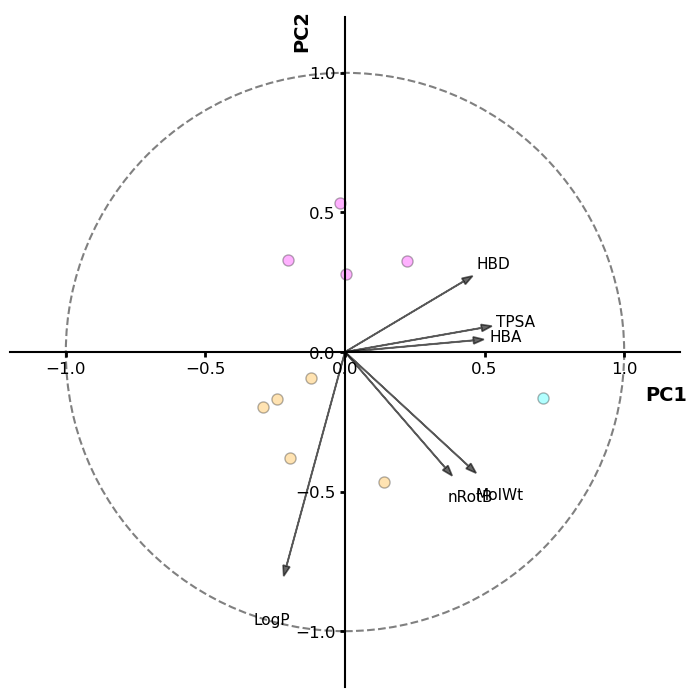

In [48]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()